# Assignment 1

In [2]:
import sys
sys.path.append('../')
from library import *
import numpy as np
import matplotlib.pyplot as plt

Used functions code are in the library and called in codes below accordingly. For more details on the function codes refer to the library

Q.1
To solve the equation, exp(−x)−x=0 using the fixed-point method up to 4 decimal places, we need to rearrange the equation into the form x=g(x) and then iteratively apply the fixed-point iteration until convergence. 

In [3]:

# Define the function for fixed-point iteration
def g(x):
    return np.exp(-x)

# Solve the equation up to 4 decimal places of accuracy
solution = fixed_point_iteration(g, 0.5, 1e-4, 10000) 
print("Solution:", round(solution, 4))


Solution: 0.5671


Q.2 
Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal
 $$ \int_0^1 \sqrt{1+x^4} dx $$

In [4]:
# Define the integrand
def integrand(x):
    return np.sqrt(1 + x**4)

error = 1e-6

In [12]:
# simpson integration
simp_sol = simp_int(integrand, 0, 1, 100)

# gaussian quadrature
quad_sol = gaussian_quad(integrand, 0, 1)

print(f'The solution using simpson method = {simp_sol:.4f}')
print(f'The solution using gaussian quadrature method = {quad_sol:.4f}')


The solution using simpson method = 1.0894
The solution using gaussian quadrature method = 1.0895


Q.3
Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01
$$ y' = \frac{5x^2-y}{e^{x+y}}, y(0) = 1.0$$

For interval size, h = 0.5, iterations = 2
For interval size, h = 0.2, iterations = 5
For interval size, h = 0.05, iterations = 20
For interval size, h = 0.01, iterations = 100


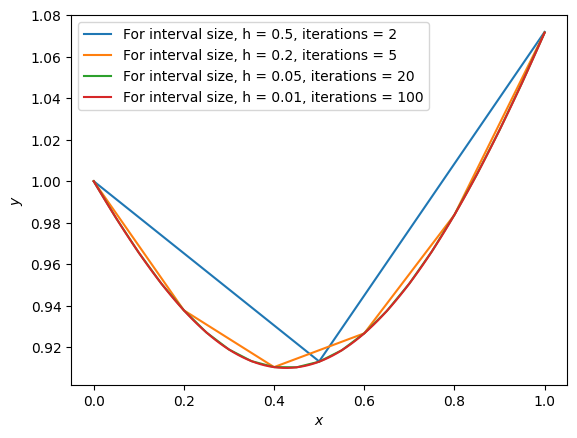

In [20]:
def f(x, y):
    return (5*x**2 - y)/(np.exp(x+y))

h = [0.5, 0.2, 0.05, 0.01]
for i in h:
    iter =[]
    X,Y, I = rungekutta_4(f, 0, 1, 1, i)
    iter.append(I)
    plt.plot(X,Y, label = 'For interval size, h = {}, iterations = {}'.format(i, I))
    plt.xlabel(r'$\mathit{x}$')
    plt.ylabel(r'$\mathit{y}$')
    plt.legend()
    print('For interval size, h = {}, iterations = {}'.format(i, I))
    

Q.4
Solve the heat equation $u_t = 4u_{xx}$, using Crank-Nicolson and your choice of α,
subjected to the boundary conditions,
$u(0, t) = u(8, t) = 0$,
$u(x,0) = 4x - \frac{x^2}{2}$

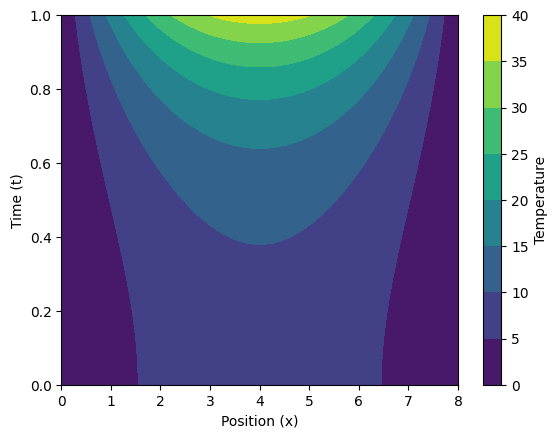

In [21]:
# Define initial condition function
def initial_condition(x):
    return 4 * x - (x**2) / 2

# Define boundary conditions functions
def boundary_x_start(t):
    return 0

def boundary_x_end(t):
    return 0

# Parameters
L = 8.0  # Length of the rod
T = 1.0  # Total time
Nx = 50   # Number of spatial points (limiting for display)
Nt = 50  # Number of time points (limiting for display)
alpha = 0.01  # Stability parameter (adjust as needed)

# Solve using Crank-Nicolson method with defined functions
x_values, t_values, u = crank_nicolson_solver(
    L, T, Nx, Nt, alpha,
    initial_condition,
    {'x_start': boundary_x_start, 'x_end': boundary_x_end}
)

# Display the limited tabulated solution
output_filename = 'question4_datapoints.txt'
with open(output_filename, 'w') as file:
    file.write("x \t\t t \t\t u\n")
    for i in range(Nx):
        for j in range(Nt):
            file.write(f"{x_values[i]:.4f} \t {t_values[j]:.4f} \t {u[i, j]:.6f}\n")

# Display the solution in a contour plot
X, T = np.meshgrid(x_values, t_values)
plt.contourf(X, T, u.T)
plt.colorbar(label='Temperature')
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.show()

Q.5

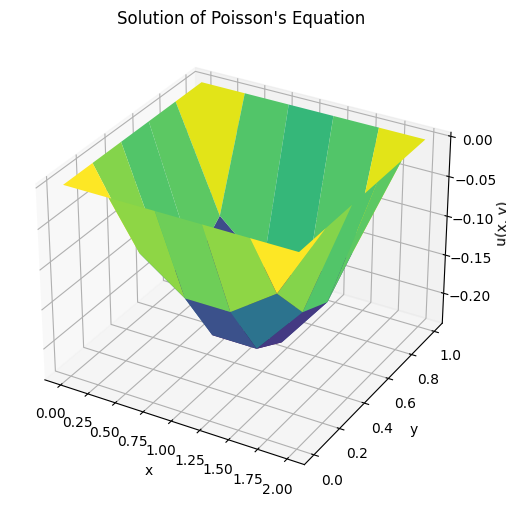

Solution in a Table:
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.0951921  -0.14795629 -0.16489177 -0.13105748  0.        ]
 [ 0.         -0.13509988 -0.21239532 -0.23478382 -0.18129486  0.        ]
 [ 0.         -0.13509988 -0.21239532 -0.23478382 -0.18129486  0.        ]
 [ 0.         -0.0951921  -0.14795629 -0.16489177 -0.13105748  0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define grid parameters
nx, ny = 6, 6
Lx, Ly = 2, 1
dx, dy = Lx / (nx - 1), Ly / (ny - 1)

# Initialize solution matrix
u = np.zeros((nx, ny))

# Set boundary conditions
u[0, :] = np.linspace(0, 1, ny) * Lx  # u(x, 0) = x
u[-1, :] = 2 * np.exp(np.linspace(0, 1, ny))  # u(2, y) = 2 * e^y
u[:, 0] = np.zeros(nx)  # u(0, y) = 0
u[:, -1] = np.linspace(0, 1, nx) * Lx * np.exp(1)  # u(x, 1) = x * e

# Perform iterative solution using finite difference method
for _ in range(1000):
    u_new = np.zeros((nx, ny))
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_new[i, j] = (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - dx * dy * np.exp(j * dy)) / 4
    u = u_new

# Display the solution
X, Y = np.meshgrid(np.linspace(0, Lx, nx), np.linspace(0, Ly, ny))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u.T, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
ax.set_title("Solution of Poisson's Equation")
plt.show()

# Display solution in a table
print("Solution in a Table:")
print(u)
